# Lab 1120

## Yiqiao Huang

### Problem 1 (a)

<img src="lab1120_1a.jpg" alt="problem 1(a)" />

### Problem 1 (b)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
Pmat = np.array([[.2, .7, .1], [.2, .5, .3], [.2, .4, .4]])
Pmat

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0.2, 0.4, 0.4]])

In [5]:
# try one time if starting from node 2
random.choices([1,2,3], Pmat[1,:])[0]

1

In [6]:
n_simu = 100 # time for simulation
res1b = [1] # realization of the chain

for i in range(n_simu):
    choices = [1, 2, 3] # 3 positions
    prob = Pmat[(res1b[i]-1),:] # probability in current position 
    result = random.choices(choices, prob)[0] # choose next position
    res1b.append(result)
print('simulation for 100 times:')
print(res1b)

simulation for 100 times:
[1, 2, 3, 1, 1, 2, 1, 1, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 3, 3, 3, 3]


### Problem 2 (a)

<img src="lab1120_2a.jpg" alt="problem 2(a)" />

### Problem 2 (b)

In [7]:
p_inf = np.array([.2, 23/45, 13/45])

Define a function to get the result of $||\pi_i-\pi_{\infty}||_2^2$

In [9]:
def get_norm2(pi, n=30):
    res = []
    for i in range(n):
        pi = pi @ Pmat # get pi_i.T
        norm2_res = np.linalg.norm(pi-p_inf, ord=2) # calculate norm2
        res.append(norm2_res) 
    return res

Set 4 $\pi_0$ and compare the results

In [64]:
n = 20
pi1 = np.array([.2,.5,.3]) # pi0
res1 = get_norm2(pi1, n)

In [65]:
pi2 = np.array([.9,.1,0]) # pi0
res2 = get_norm2(pi2, n)

In [66]:
pi3 = np.array([1/3,1/3,1/3]) # pi0
res3 = get_norm2(pi3, n)

In [67]:
pi4 = np.array([.1,.8,.1]) # pi0
res4 = get_norm2(pi4, n)

plot the results

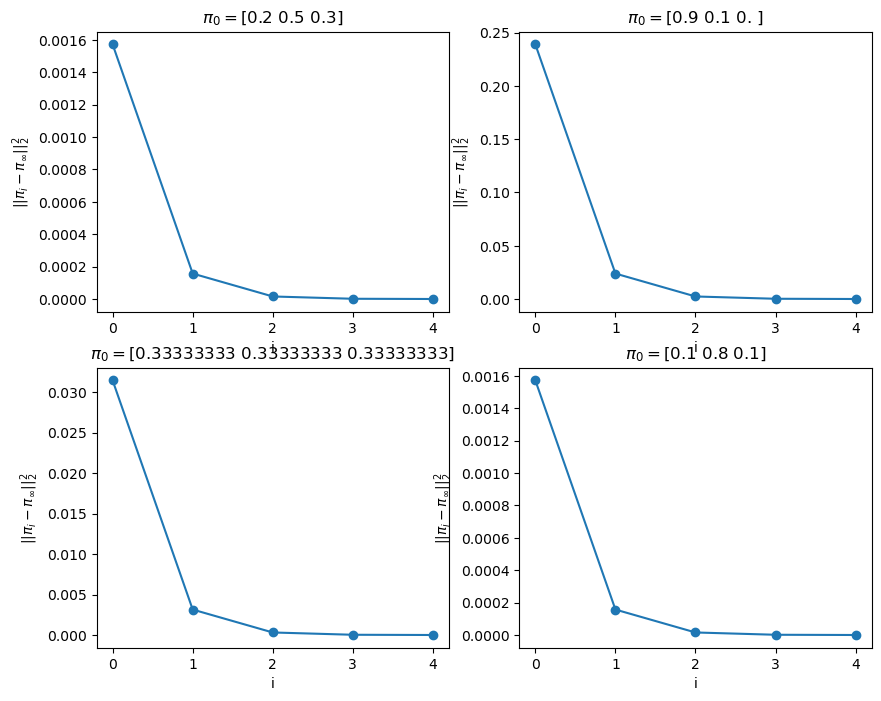

In [108]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, (i+1))
    plt.plot(range(5), locals()[f'res{i+1}'][0:5], marker='o')
    plt.xlabel('i')
    plt.ylabel(r'$||\pi_i-\pi_{\infty}||_2^2$')
    pi_name = f'pi{i+1}'
    plt.title(r'$\pi_0 =$'+f'{locals()[pi_name]}')

In [106]:
print('norm2 difference goes to 0 when i =', np.min(np.where(np.array(res1)==0))+1, 'with pi0 =',pi1)
print('norm2 difference goes to 0 when i =', np.min(np.where(np.array(res2)==0))+1, 'with pi0 =',pi2)
print('norm2 difference goes to 0 when i =', np.min(np.where(np.array(res3)==0))+1, 'with pi0 =',pi3)
print('norm2 difference goes to 0 when i =', np.min(np.where(np.array(res4)==0))+1, 'with pi0 =',pi4)

norm2 difference goes to 0 when i = 16 with pi0 = [0.2 0.5 0.3]
norm2 difference goes to 0 when i = 19 with pi0 = [0.9 0.1 0. ]
norm2 difference goes to 0 when i = 16 with pi0 = [0.33333333 0.33333333 0.33333333]
norm2 difference goes to 0 when i = 16 with pi0 = [0.1 0.8 0.1]


From the above plot and output results, we can observe that for $\pi_1$, it is close to $\pi_{\infty}$. Therefore, the computed $||\pi_i-\pi_{\infty}||_2^2$ is relatively small, and the convergence is very rapid. However, for $\pi_2$, it is far from $\pi_{\infty}$, resulting in slower convergence and a larger $||\pi_i-\pi_{\infty}||_2^2$.

### problem 3(a)

Define a funciton to get arrival time.

In [133]:
def arrival_time(start_node, Pmat):
    res = [start_node] # realization of the chain
    node = start_node
    i = 0
    while node != 3:
        choices = [1, 2, 3] # 3 positions
        prob = Pmat[(node-1),:] # probability in current position 
        node = random.choices(choices, prob)[0] # choose next position
        i = i+1
        #print(i,': ',node)
    return i

In [132]:
arrival_time(1, Pmat) # try one time

1 :  1
2 :  1
3 :  2
4 :  2
5 :  2
6 :  2
7 :  2
8 :  2
9 :  3


9

In [150]:
n = 10000
res1 = [arrival_time(1, Pmat) for n0 in range(n)]
res2 = [arrival_time(2, Pmat) for n0 in range(n)]

Text(0.5, 1.0, 'Histogram of arrival time (count the number of results)')

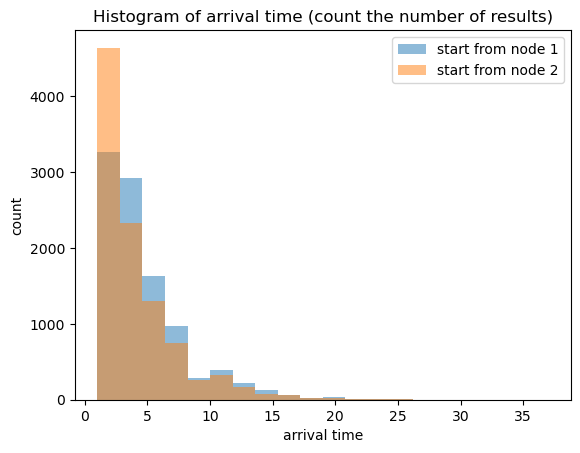

In [151]:
plt.hist(res1, density=0, bins=20, alpha=.5, label='start from node 1')
plt.hist(res2, density=0, bins=20, alpha=.5, label='start from node 2')
plt.xlabel('arrival time')
plt.ylabel('count')
plt.legend()
plt.title('Histogram of arrival time (count the number of results)')

Text(0.5, 1.0, 'Histogram of arrival time (density of results)')

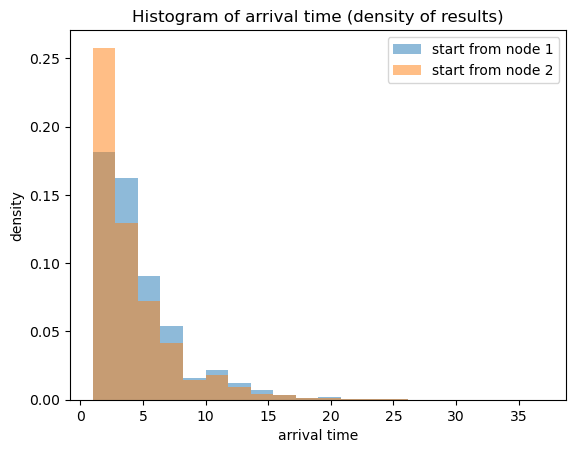

In [152]:
plt.hist(res1, density=1, bins=20, alpha=.5, label='start from node 1')
plt.hist(res2, density=1, bins=20, alpha=.5, label='start from node 2')
plt.xlabel('arrival time')
plt.ylabel('density')
plt.legend()
plt.title('Histogram of arrival time (density of results)')

In [153]:
print('mean time for arriving node 3 if starting from node 1:',np.mean(res1))
print('mean time for arriving node 3 if starting from node 2:',np.mean(res2))

mean time for arriving node 3 if starting from node 1: 4.6241
mean time for arriving node 3 if starting from node 2: 3.8811


In [154]:
print('theoritical mu1:', 60/13)
print('theoritical mu2:', 50/13)

theoritical mu1: 4.615384615384615
theoritical mu2: 3.8461538461538463


The simulation results and theoritical results are close.

### problem 3(b)

<img src="lab1120_3b.jpg" alt="problem 3(b)" />